Design your own Convolutional Neural Network to classify images from a reduced version of the
Dogs vs Cats dataset. Use the RELU activation function and the Adam optimiser. Change the other
parameters of the network and hyperparameters to achieve the best accuracy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [2]:
import zipfile
import os
zip_ref= zipfile.ZipFile('dogs-vs-cats-vvsmall.zip','r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
# load the libraries
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras


C:\Users\yamup\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
base_dir= '/tmp/dogs-vs-cats-vvsmall' 
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

#Directory with the train cat images
train_cat_dir=os.path.join(train_dir,'cats')

#directory with the train dog images
train_dog_dir=os.path.join(train_dir,'dogs')

#directory with the validation cat images
validation_cat_dir=os.path.join(validation_dir,'cats')

#directory with the  validation dogs images
validation_dog_dir=os.path.join(validation_dir,'dogs')

#get the data set details

In [5]:
train_cat=os.listdir(train_cat_dir)
print(len(train_cat))
print(train_cat[:5])

3000
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']


In [6]:
train_dog=os.listdir(train_dog_dir)
print("the length of the training data set of dog is:",len(train_dog))
print(train_dog[:5],"\n")

validation_dog=os.listdir(validation_dog_dir)
print("the length of the validation data set of dog is:",len(validation_dog))
print(validation_dog[:5],"\n")

validation_cat=os.listdir(validation_cat_dir)
print("the length of the validation data set of cat is:",len(validation_cat))
print(validation_dog[:5],"\n")

the length of the training data set of dog is: 3000
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg'] 

the length of the validation data set of dog is: 900
['dog.8500.jpg', 'dog.8501.jpg', 'dog.8502.jpg', 'dog.8503.jpg', 'dog.8504.jpg'] 

the length of the validation data set of cat is: 900
['dog.8500.jpg', 'dog.8501.jpg', 'dog.8502.jpg', 'dog.8503.jpg', 'dog.8504.jpg'] 



In [5]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [6]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:

history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=50
                  )    

Epoch 1/50
188/188 [==============================] - 135s 712ms/step - loss: 0.6905 - accuracy: 0.5275 - val_loss: 0.6870 - val_accuracy: 0.5144
Epoch 2/50
188/188 [==============================] - 104s 555ms/step - loss: 0.6643 - accuracy: 0.5928 - val_loss: 0.6713 - val_accuracy: 0.5733
Epoch 3/50
188/188 [==============================] - 106s 563ms/step - loss: 0.6246 - accuracy: 0.6410 - val_loss: 0.6198 - val_accuracy: 0.6506
Epoch 4/50
188/188 [==============================] - 105s 558ms/step - loss: 0.5907 - accuracy: 0.6750 - val_loss: 0.5986 - val_accuracy: 0.6761
Epoch 5/50
188/188 [==============================] - 106s 561ms/step - loss: 0.5326 - accuracy: 0.7358 - val_loss: 0.5423 - val_accuracy: 0.7344
Epoch 6/50
188/188 [==============================] - 116s 616ms/step - loss: 0.4816 - accuracy: 0.7660 - val_loss: 0.4571 - val_accuracy: 0.7944
Epoch 7/50
188/188 [==============================] - 123s 655ms/step - loss: 0.4085 - accuracy: 0.8145 - val_loss: 0.4266 -

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

57/57 [==============================] - 9s 152ms/step - loss: 1.2359 - accuracy: 0.8456
Test accuracy: 0.8455555438995361


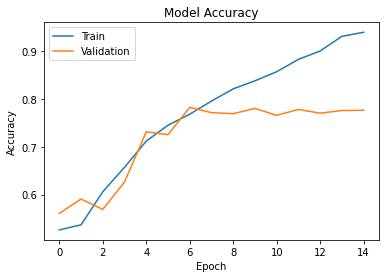

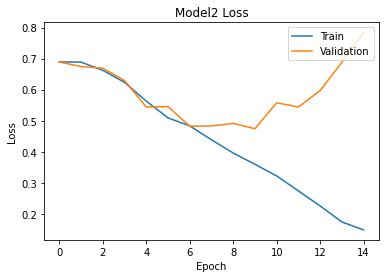

In [9]:

# Train the model and record the training history
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set up the model architecture
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

# Set up the optimizer and compile the model
# Set up the loss function and optimizer

adam = Adam(lr=0.001)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
# Compile the model
#model1.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history1 = model1.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(validation_generator)
print('Test accuracy:', test_acc)


Epoch 1/50


C:\Users\yamup\anaconda3\lib\site-packages\keras\backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


InvalidArgumentError: Graph execution error:

Detected at node 'binary_crossentropy/logistic_loss/mul' defined at (most recent call last):
    File "C:\Users\yamup\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\yamup\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\yamup\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\yamup\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\yamup\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\yamup\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\yamup\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\yamup\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\yamup\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\yamup\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\yamup\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\yamup\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\yamup\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\yamup\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\yamup\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\yamup\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\yamup\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\yamup\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\yamup\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\yamup\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\yamup\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\yamup\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "C:\Users\yamup\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\yamup\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\yamup\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\yamup\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\yamup\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-10-93caf653eb7e>", line 44, in <module>
      history1 = model1.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[early_stop])
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
      backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
      return tf.nn.sigmoid_cross_entropy_with_logits(
Node: 'binary_crossentropy/logistic_loss/mul'
Incompatible shapes: [32,1] vs. [288,1]
	 [[{{node binary_crossentropy/logistic_loss/mul}}]] [Op:__inference_train_function_5331]

In [1]:

# Plot the training and validation accuracy curves
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

NameError: ignored

In [ ]:
loss, accuracy = model1.evaluate(validation_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 32 using train_datagen generator
train_generator1 = train_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator1 = validation_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set up the model architecture
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(200,200,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

# Set up the optimizer and compile the model
adam = Adam(lr=0.001)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history1 = model1.fit(train_generator1, epochs=100, validation_data=validation_generator1, callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(validation_generator1)
print('Test accuracy:', test_acc)


Epoch 1/100
188/188 [==============================] - 429s 2s/step - loss: 0.6945 - accuracy: 0.5085 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/100
188/188 [==============================] - 420s 2s/step - loss: 0.6933 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
188/188 [==============================] - 428s 2s/step - loss: 0.6938 - accuracy: 0.4965 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/100
188/188 [==============================] - 438s 2s/step - loss: 0.6936 - accuracy: 0.5027 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/100
188/188 [==============================] - 430s 2s/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/100
188/188 [==============================] - 421s 2s/step - loss: 0.6919 - accuracy: 0.5212 - val_loss: 0.6825 - val_accuracy: 0.5806
Epoch 7/100
188/188 [==============================] - 427s 2s/step - loss: 0.6906 - accuracy: 0.5420 - val_loss: 0.6922 - val_accuracy:

In [10]:

# Plot the training and validation accuracy curves
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

NameError: name 'history1' is not defined

#second check with some data augmentation techniques

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen2 = ImageDataGenerator(rescale=1./255)

#Training Set
train_set2 = train_datagen2.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set2 = test_datagen2.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/validation',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)


Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [21]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
model2.add(Conv2D(32,(3,3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))
model2.add(Flatten())
model2.add(Dense(units=128,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))
#adam = tensorflow.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])


In [23]:
history2=model2.fit(train_set2,
                        #steps_per_epoch=800, 
                        epochs = 15,
                        validation_data = test_set2,
                        #validation_steps = 20, 
                        #callbacks=[tensorboard]
                        callbacks=[early_stop]
                        );

Epoch 1/15


KeyError: in user code:

    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\engine\training.py", line 1027, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 527, in minimize
        self.apply_gradients(grads_and_vars)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1140, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 634, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1166, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1216, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1213, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "C:\Users\yamup\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 216, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable conv2d_36/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.{self.__class__.__name__}.'


In [ ]:
history2.summary()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_set2)
print('Test accuracy:', test_acc)

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen3 = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen3 = ImageDataGenerator(rescale=1./255)

#Training Set
train_set3 = train_datagen3.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/train',
                                             target_size=(200,200),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set3 = test_datagen3.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/validation',
                                           target_size=(200,200),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(200,200,3)))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 64)      

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Set up the optimizer and compile the model
adam = Adam(learning_rate=0.001)
model3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history3 = model3.fit(train_set3, epochs=30, validation_data=test_set3, callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_set3)
print('Test accuracy:', test_acc)


Epoch 1/30
188/188 [==============================] - 142s 749ms/step - loss: 0.6925 - accuracy: 0.5272 - val_loss: 0.6762 - val_accuracy: 0.6178
Epoch 2/30
188/188 [==============================] - 137s 728ms/step - loss: 0.6594 - accuracy: 0.6095 - val_loss: 0.6026 - val_accuracy: 0.6628
Epoch 3/30
188/188 [==============================] - 139s 741ms/step - loss: 0.6068 - accuracy: 0.6710 - val_loss: 0.5605 - val_accuracy: 0.7217
Epoch 4/30
188/188 [==============================] - 141s 748ms/step - loss: 0.5716 - accuracy: 0.7035 - val_loss: 0.5532 - val_accuracy: 0.7117
Epoch 5/30
188/188 [==============================] - 144s 765ms/step - loss: 0.5398 - accuracy: 0.7333 - val_loss: 0.5488 - val_accuracy: 0.7339
Epoch 6/30
188/188 [==============================] - 141s 748ms/step - loss: 0.4989 - accuracy: 0.7622 - val_loss: 0.5019 - val_accuracy: 0.7622
Epoch 7/30
188/188 [==============================] - 141s 749ms/step - loss: 0.4671 - accuracy: 0.7785 - val_loss: 0.4756 -

NameError: name 'validation_generator1' is not defined

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_set3)
print('Test accuracy:', test_acc)

57/57 [==============================] - 10s 182ms/step - loss: 0.3437 - accuracy: 0.8889
Test accuracy: 0.8888888955116272


#good model is below model3

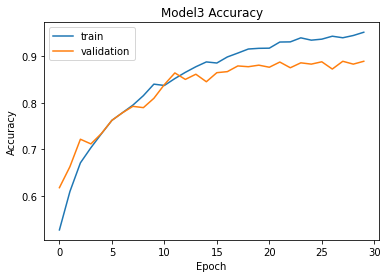

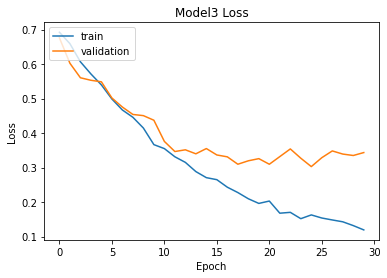

In [18]:


# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
# Train the model
history3 = model3.fit(train_set3, epochs=50, validation_data=test_set3, callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_set3)
print('Test accuracy:', test_acc)


Epoch 1/50
188/188 [==============================] - 128s 680ms/step - loss: 0.1179 - accuracy: 0.9540 - val_loss: 0.3824 - val_accuracy: 0.8822
Epoch 2/50
188/188 [==============================] - 139s 740ms/step - loss: 0.1103 - accuracy: 0.9583 - val_loss: 0.3754 - val_accuracy: 0.8922
Epoch 3/50
188/188 [==============================] - 139s 740ms/step - loss: 0.1119 - accuracy: 0.9550 - val_loss: 0.3754 - val_accuracy: 0.8856
Epoch 4/50
188/188 [==============================] - 143s 762ms/step - loss: 0.0997 - accuracy: 0.9615 - val_loss: 0.3849 - val_accuracy: 0.8811
Epoch 5/50
188/188 [==============================] - 161s 858ms/step - loss: 0.1035 - accuracy: 0.9598 - val_loss: 0.4070 - val_accuracy: 0.8917
Epoch 6/50
188/188 [==============================] - 155s 822ms/step - loss: 0.1007 - accuracy: 0.9588 - val_loss: 0.4148 - val_accuracy: 0.8856
Epoch 7/50
188/188 [==============================] - 134s 714ms/step - loss: 0.0941 - accuracy: 0.9643 - val_loss: 0.4060 -

In [20]:
# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_set3)
print('Test accuracy:', test_acc)

57/57 [==============================] - 9s 159ms/step - loss: 0.4166 - accuracy: 0.8944
Test accuracy: 0.894444465637207


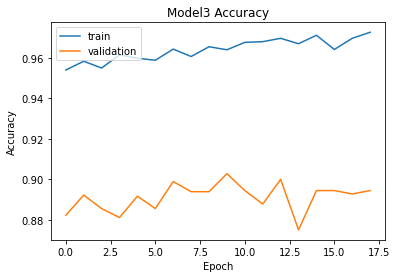

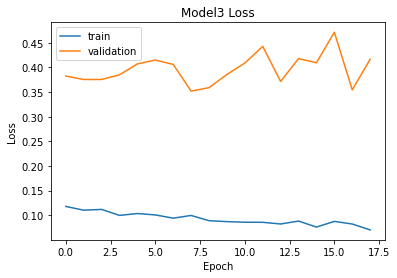

In [21]:
# Accuracy plot
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#check 5

In [29]:

from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen5 = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen5 = ImageDataGenerator(rescale=1./255)

#Training Set
train_set5 = train_datagen5.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/train',
                                             target_size=(200,200),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set5 = test_datagen5.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/validation',
                                           target_size=(200,200),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
model5 = Sequential()

model5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3),
                 kernel_regularizer=regularizers.l2(0.01)))  # Add weight decay regularization to convolutional layer
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())

model5.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))  # Change output layer

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss function

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history5 = model5.fit(train_set5, epochs=30, validation_data=test_set5, callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model5.evaluate(test_set5)
print('Test accuracy:', test_acc)


Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Epoch 1/30
188/188 [==============================] - 209s 1s/step - loss: 1.5456 - accuracy: 0.5118 - val_loss: 0.9232 - val_accuracy: 0.5000
Epoch 2/30
188/188 [==============================] - 216s 1s/step - loss: 0.8828 - accuracy: 0.5188 - val_loss: 0.8550 - val_accuracy: 0.5578
Epoch 3/30
188/188 [==============================] - 210s 1s/step - loss: 0.8373 - accuracy: 0.5380 - val_loss: 0.8233 - val_accuracy: 0.5150
Epoch 4/30
188/188 [==============================] - 218s 1s/step - loss: 0.8065 - accuracy: 0.5447 - val_loss: 0.7947 - val_accuracy: 0.5261
Epoch 5/30
188/188 [==============================] - 226s 1s/step - loss: 0.7838 - accuracy: 0.5535 - val_loss: 0.7777 - val_accuracy: 0.5350
Epoch 6/30
188/188 [==============================] - 197s 1s/step - loss: 0.7656 - accuracy: 0.5513 - val_loss: 0.7576 - val_accuracy: 0.5306
Epoch 7/30
188/188 [==============================] - 218s

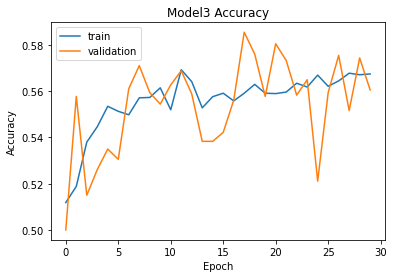

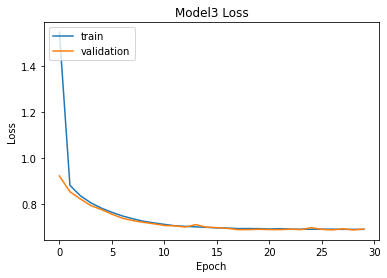

In [30]:
# Accuracy plot
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
history6 = model5.fit(train_set5, epochs=80, validation_data=test_set5, callbacks=[early_stop])


Epoch 1/80
188/188 [==============================] - 183s 972ms/step - loss: 0.6933 - accuracy: 0.5578 - val_loss: 0.6901 - val_accuracy: 0.5828
Epoch 2/80
188/188 [==============================] - 194s 1s/step - loss: 0.6914 - accuracy: 0.5675 - val_loss: 0.6873 - val_accuracy: 0.5911
Epoch 3/80
188/188 [==============================] - 204s 1s/step - loss: 0.6915 - accuracy: 0.5637 - val_loss: 0.6891 - val_accuracy: 0.5828
Epoch 4/80
188/188 [==============================] - 195s 1s/step - loss: 0.6925 - accuracy: 0.5643 - val_loss: 0.6952 - val_accuracy: 0.5483
Epoch 5/80
188/188 [==============================] - 194s 1s/step - loss: 0.6924 - accuracy: 0.5632 - val_loss: 0.6873 - val_accuracy: 0.5839
Epoch 6/80
188/188 [==============================] - 193s 1s/step - loss: 0.6922 - accuracy: 0.5635 - val_loss: 0.6925 - val_accuracy: 0.5467
Epoch 7/80
188/188 [==============================] - 204s 1s/step - loss: 0.6916 - accuracy: 0.5667 - val_loss: 0.6928 - val_accuracy: 0.5

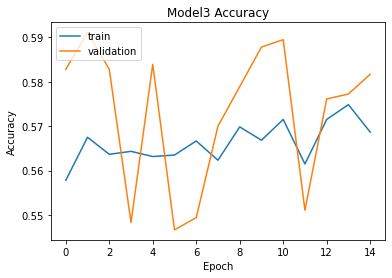

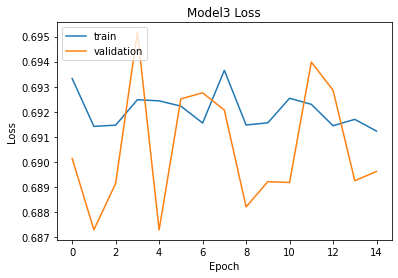

In [33]:
# Accuracy plot
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen6 = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen6 = ImageDataGenerator(rescale=1./255)

#Training Set
train_set6 = train_datagen6.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/train',
                                             target_size=(200,200),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set6 = test_datagen6.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/validation',
                                           target_size=(200,200),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model6 = Sequential()
model6.add(Conv2D(filters=24, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(200,200,3)))
model6.add(MaxPooling2D(2,2))
model6.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model6.add(MaxPooling2D(2,2))
model6.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model6.add(MaxPooling2D(2,2))
model6.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model6.add(MaxPooling2D(2,2))
model6.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model6.add(MaxPooling2D(2,2))
model6.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model6.add(MaxPooling2D(2,2))
model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(1,activation='sigmoid'))
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 200, 200, 24)      672       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 100, 100, 24)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 32)      6944      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 25, 25, 64)      

In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Set up the optimizer and compile the model
adam = Adam(learning_rate=0.001)
model6.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history6 = model6.fit(train_set6, epochs=30, validation_data=test_set6, callbacks=[early_stop])

Epoch 1/30
188/188 [==============================] - 168s 884ms/step - loss: 0.6942 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
188/188 [==============================] - 167s 885ms/step - loss: 0.6926 - accuracy: 0.5125 - val_loss: 0.7041 - val_accuracy: 0.5683
Epoch 3/30
188/188 [==============================] - 155s 823ms/step - loss: 0.6884 - accuracy: 0.5398 - val_loss: 0.6760 - val_accuracy: 0.5606
Epoch 4/30
188/188 [==============================] - 157s 835ms/step - loss: 0.6595 - accuracy: 0.6108 - val_loss: 0.6294 - val_accuracy: 0.6506
Epoch 5/30
188/188 [==============================] - 158s 839ms/step - loss: 0.6252 - accuracy: 0.6615 - val_loss: 0.6133 - val_accuracy: 0.6756
Epoch 6/30
188/188 [==============================] - 156s 827ms/step - loss: 0.5872 - accuracy: 0.6952 - val_loss: 0.5963 - val_accuracy: 0.6767
Epoch 7/30
188/188 [==============================] - 167s 887ms/step - loss: 0.5497 - accuracy: 0.7247 - val_loss: 0.5248 -

In [38]:
# Evaluate the model on the test set
test_loss, test_acc = model6.evaluate(test_set6)
print('Test accuracy:', test_acc)

57/57 [==============================] - 10s 173ms/step - loss: 0.3926 - accuracy: 0.8544
Test accuracy: 0.8544444441795349


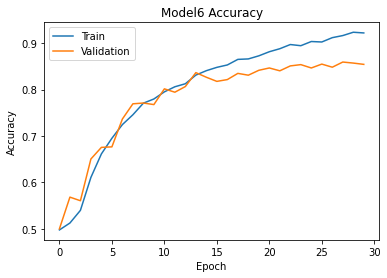

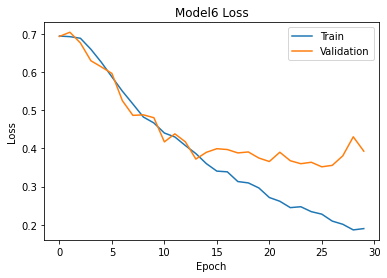

In [39]:
# Plot the training and validation accuracy curves
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#model 6 and model 3 looks similar so i decided model 3 is best for this dataset its having good accuracy than model6